# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Handi Sutriyan 
- Email: handisutrian@gmail.com
- Id Dicoding: handisutriyan

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import openpyxl
import shap

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,StratifiedKFold,cross_val_predict, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

### Menyiapkan data yang akan digunakan

In [2]:
raw_df = pd.read_csv('data.csv',sep=None, engine='python')

In [3]:
raw_df.head()

,﻿Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Understanding

Pada bagian ini akan dilakukan serangkaian langkah untuk memahami struktur dan komposisi data. Untuk menjaga agar dataframe asli tidak berubah pada saat proses ini, `raw_df` akan disalin menjadi `eda_df`.

In [4]:
eda_df = raw_df.copy()

Kita akan melihat terlebih dahulu pratinjau dari `eda_df` dengan fungsi `head()` untuk mengetahui secara umum struktur dataframe.

In [5]:
eda_df.head()

,﻿Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Terlihat bahwa struktur `eda_df` sudah sama dengan `raw_df`. Selanjutnya kita akan melihat struktur kolomnya, untuk melihat fitur-fitur apa saja yang tersedia.

In [6]:
eda_df.columns

Index(['﻿Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_wi

In [7]:
len(eda_df.columns)

37

Terdapat total 37 kolom pada dataset, dengan 35 kolom seperti yang ada pada deskripsi di [tautan ini](https://github.com/dicodingacademy/dicoding_dataset/blob/main/students_performance/README.md), dan 3 kolom tambahan yaitu `Unemployment_rate`, `Inflation_rate`, dan `GDP`. 
Berdasarkan deksripsi pada tautan tersebut, fitur yang tersedia dapat dikelompokkan menjadi dua kelompok yaitu fitur kategorikal dan fitur numerik. Masing-masing fiturnya sebagai berikut:

1. Kategorikal: categorical_cols = `﻿Marital_status`,`Application_mode`, `Application_order`, `Course`, `Daytime_evening_attendance`, `Nacionality`, `Mothers_qualification`, `Fathers_qualification`, `Mothers_occupation`, `Fathers_occupation`,`Displaced`,`Educational_special_needs`, `Debtor`,`Tuition_fees_up_to_date`, `Gender`, `Scholarship_holder`, `International`, dan `Status`.

2. Numerik: `Admission_grade`, `Age_at_enrollment`, `Curricular_units_1st_sem_credited`, `Curricular_units_1st_sem_enrolled`, `Curricular_units_1st_sem_evaluations`,`Curricular_units_1st_sem_approved`, `Curricular_units_1st_sem_grade`, `Curricular_units_1st_sem_without_evaluations`,`Curricular_units_2nd_sem_credited`, `Curricular_units_2nd_sem_enrolled`, `Curricular_units_2nd_sem_evaluations`,`Curricular_units_2nd_sem_approved`, `Curricular_units_2nd_sem_grade`, `Curricular_units_2nd_sem_without_evaluations`, `Unemployment_rate`,`Inflation_rate`, dan `GDP`.

Selanjutnya kita akan melihat struktur tipe datanya, dengan fungsi `info()`

In [12]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ﻿Marital_status                               4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Berdasarkan data di atas, terdapat tiga tipe data yaitu: `int64`, `float64`, dan `object`. Terdapat total 4424 baris data, dan tidak ditemukan data kosong. Namun, terlihat beberapa kolom yang seharusnya bertipe data boolen yaitu: `Displaced`, `Educational_special_needs`, `Debtor`, `Tuition_fees_up_to_date`,  `Scholarship_holder`, dan `International `, tapi masih bertipe `int64`.

Selanjutnya, akan dilakukan analisis untuk mencari anomali nilai data yang ada dengan fungsi `describe()`.

In [13]:
eda_df.describe(include='all')

,﻿Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


Terlihat bahwa tidak ditemukan anomali data, dan semua data berada pada rentang yang wajar.

Selanjutnya kita akan melihat sebaran data status siswa secara umum

In [14]:
n_status = eda_df['Status'].value_counts()
n_status

Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

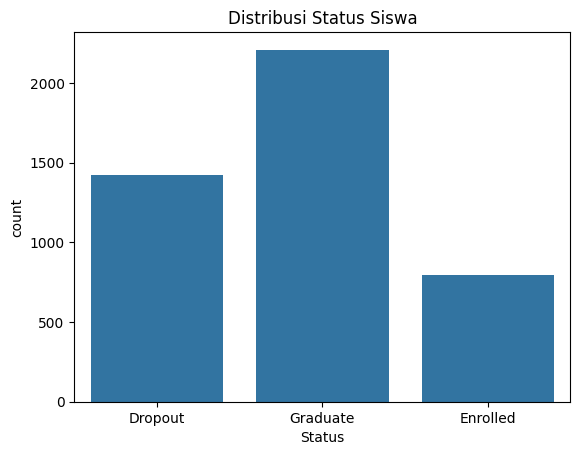

In [15]:
sns.countplot(x='Status', data=eda_df)
plt.title("Distribusi Status Siswa")
plt.show()

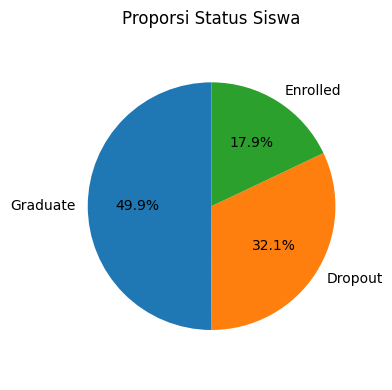

In [16]:
labels =n_status.index
sizes = n_status.values

# Pie chart
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%.1f%%', startangle=90)
plt.title('Proporsi Status Siswa')
plt.axis('equal')  # Membuat pie chart menjadi lingkaran sempurna
plt.tight_layout()
plt.show()

Berdasarkan ketiga visualisais di atas, terlihat jika total siswa yang lulus (Graduate) mendominasi sebanyak **2209(49.9%)** siswa. Sedangkan siswa yang Droput cukup banyak di angka **1421(32.1%)** siswa, sisanya dalah siswa yang masih belajar (enrolled) sebanyak **794(17.9%)** siswa. 

Selanjutnya akan dilakukan analis lanjutan pengaruh tiap-tiap fitur terhadap tingkat dropout ini, baik fitur kategorikal dan numerik.

### Analisis Fitur Kategorikal

Masukkan fitur-fitur kategorikal ke dalam list `categorical_cols`

In [17]:
categorical_cols = ['﻿Marital_status','Application_mode', 'Course',
       'Daytime_evening_attendance', 'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation','Displaced', 
       'Educational_special_needs', 'Debtor','Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'International']

Masing-masing fitur akan divisualisasikan dengan stcaked bar terhadap status siswa, untuk melihat sebaran data dan demografi siswa yang dropout.

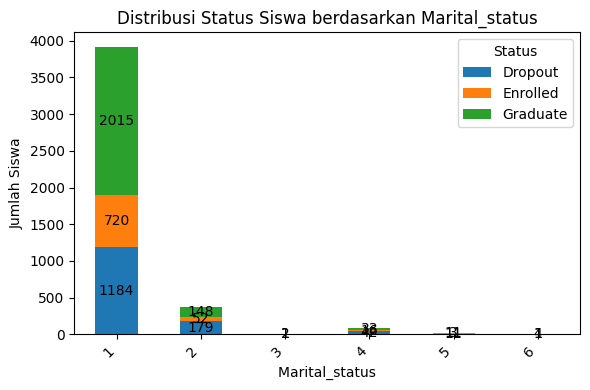

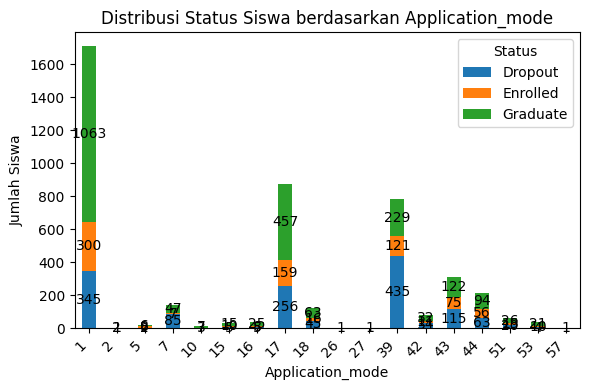

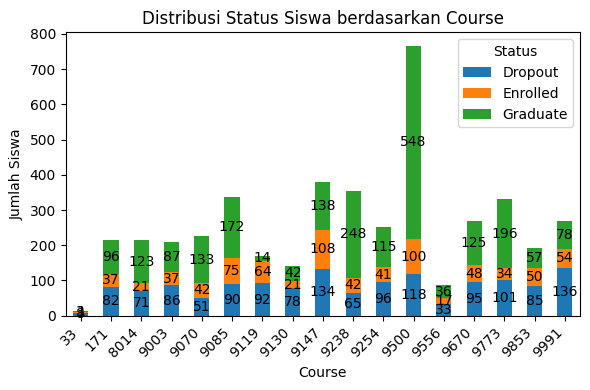

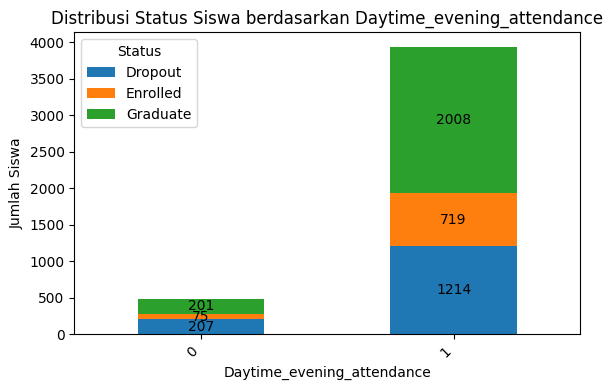

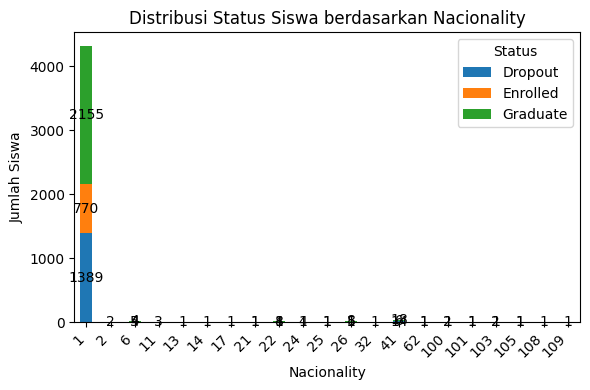

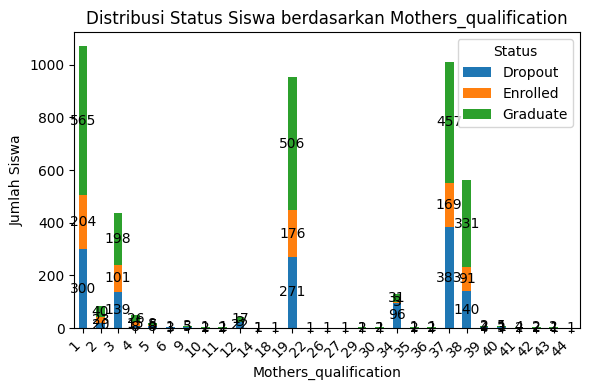

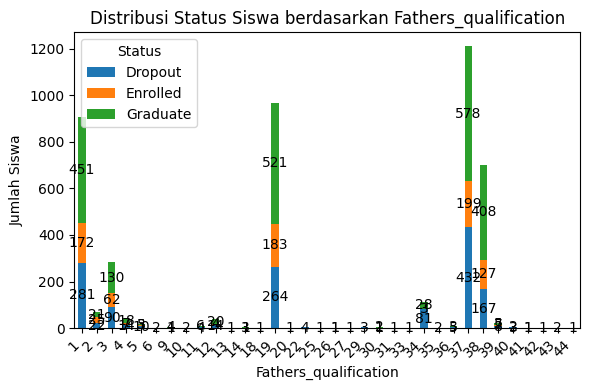

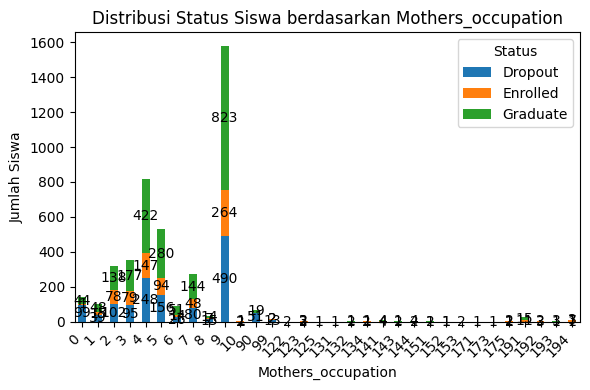

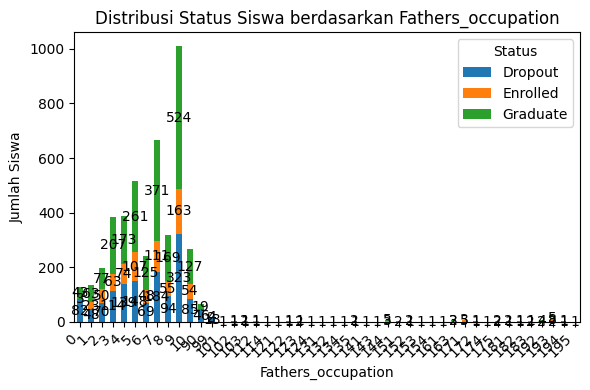

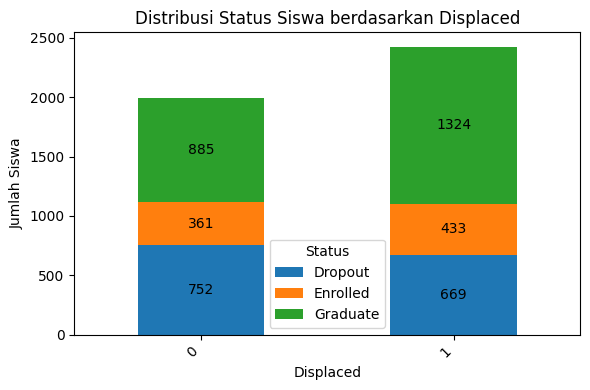

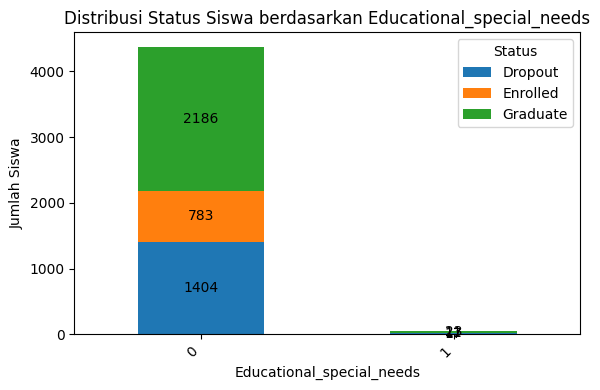

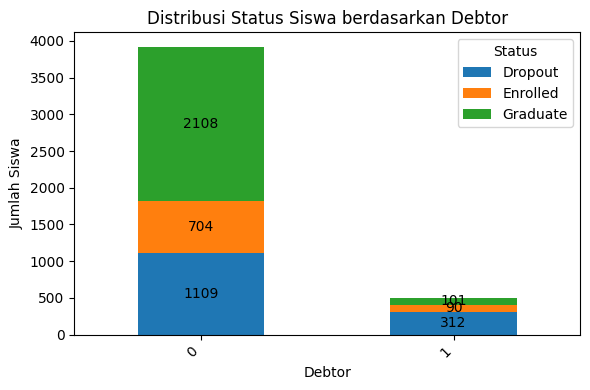

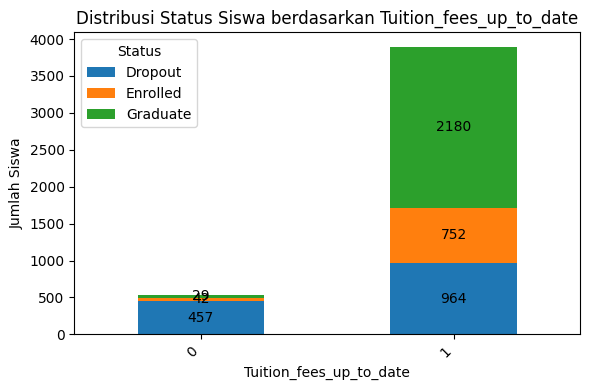

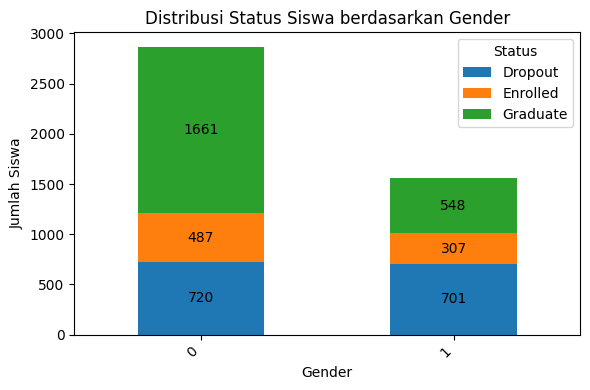

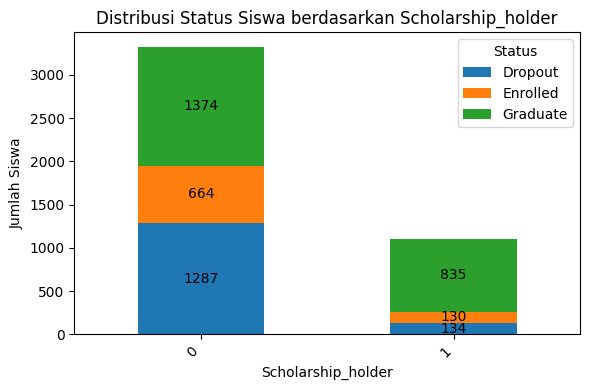

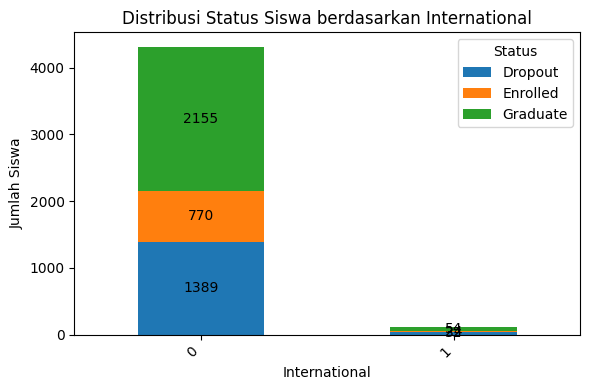

In [77]:
for col in categorical_cols:
    cross_tab = pd.crosstab(eda_df[col], eda_df['Status'])
    ax = cross_tab.plot(kind='bar', stacked=True, figsize=(6, 4))
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        if height > 0:  # Hanya annotasi jika nilai > 0
            ax.text(
                p.get_x() + width / 2,
                p.get_y() + height / 2,
                f'{int(height)}',
                ha='center',
                va='center'
            )
    
    plt.title(f'Distribusi Status Siswa berdasarkan {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah Siswa')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Status')
    plt.tight_layout()
    plt.show()

Berdasarkan visualisasi di atas, dapat terlihat sebaran data siswa yang dropout pada fitur-fitur kategorikal. Maka, dapat diambil kesimpulan bahwa demografi siswa yang dropout adalah sebagai berikut:
1. Ekonomi:
    - `Scholarship_holder` : Siswa yang *bukan* pemegang beasiswa (*scholarship*) lebih banyak yang dropout.
    - `Tuition_fees_up_to_date`: Siswa yang biaya sekolahnya tepat waktu lebih banyak dropout.
    - `Debtor`: Kebanyakan siswa yang dropout bukan merupakan *Debtor*.
    - `Displaced`: Jumlah siswa yang dropout dari kalangan terlantar dan yang bukan memiliki selisih yang tidak jauh yaitu 752 siswa tidak terlantar dan 669 siswa terlantar, namun tingkat kelulusan siswa terlantar lebih tinggi yaitu 1324 siswa dibandingkan siswa tidak terlantar sebanyak 885 siswa.
2. Akademik:
    - `Application_mode`: Siswa yang dropout didominasi oleh tiga mode pendaftaran yaitu 1 (*1st phase - general contingent*), 17 (*2nd phase - general contingent*) dan 39 (*Over 23 years old*). Ini berarti siswa yang dropout kebayankan berasal dari pendaftaran *general contigent* gelombang 1 dan 2, serta pendaftar dengan usia di atas 23 tahun, semua mencatatkan lebih dari 250 siswa dropout dari tiga sistem pendaftaran tersebut, dan yang paling banyak adalah pendaftar dengan jalur pendaftaran *usia di atas 23 tahun* sebanyak *435 siswa*.
    - `Course`: Terdapat empat kursus dengan catatan siswa dropout lebih dari 100 orang yaitu 9147 (Management),9500 (Nursing), 9773(Journalism and Communication), dan yang paling banyak kursus 9991 (Management (evening attendance)) sebanyak 136 siswa.
    - `Daytime_evening_attendance`: Siswa dropout didominasi oleh siswa dengan kelas sore sebanyak 1214, tetapi mayoritas siswa secara keseluruhan juga mengambil kelas sore.
    - `Educational_special_needs`: Siswa tanpa kebutuhan pendidikan khusus mendominasi jumlah siswa yang dropout.
3. Latar belakang & Keluarga:
    - `Marital_status`: Siswa dropout didominasi oleh siswa dengan status lajang/*single*.
    - `Nacionality`: Siswa warga negara Portugal mendominasi siswa yang dropout.
    - `Mothers_qualification`: Siswa dropout didominasi oleh tiga kelompok utama yang melebihi 250 siswa yaitu 1 (Secondary Education - 12th Year of Schooling or Equivalent), 19 (Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent) dan yang paling banyak 38 (Basic Education 2nd Cycle (6th/7th/8th Year) or Equivalent) sebanyak *389 siswa*. Ini berarti kebanyakan didominasi oleh siswa dengan pendidikan terakhir ibunya adalah pendidikan dasar hingga menengah.
    - `Fathers_qualification`: Sama seperti latar balakang pendidikan ibu, siswa dropout juga didominasi oleh siswa dengan latar belakang pendidikan ayah pendidikan dasar hingga menengah dan yang paling banyak didominasi oleh siswa dengan pendidikan terakhir ayahnya adalah 38 (Basic Education 2nd Cycle (6th/7th/8th Year) or Equivalent)
    - `Mothers_occupation`: Siswa dengan latar belakang pekerjaan ibu sebagai *Unskilled Workers* atau buruh kasar mendominasi tingkat dropout.
    - `Fathers_occupation`: Siswa dengan latar belakang pekerjaan ayah sebagai *Unskilled Workers* atau buruh kasar mendominasi tingkat dropout
    - `Gender`: Secara gender, siswa dropout baik laki-laki dan perempuan memilki jumlah banyak dimana laki-laki sebanyak 701 siswa, dan perempuan sebanyak 720 siswa.
    - `International`: Siswa dalam negeri (non-international) mendominasi jumlah siswa yang dropout.

### Analisis Korelasi Fitur Numerik

Selanjutnya akan dilakukan analisis korelasi terhadap fitur-fitur numerik dengan ananlisis korelasi.

Kolom `Status` akan dibuah menjadi numerik dengan melakuakn encode/mengonversi kategori Dropout,Enrolled, dan Graduate menjadi angka 0,1, dan 2 agar bisa ikut dibandingkan dalam analisis korelasi fitur numerik.

In [19]:
#Mengubah kolom Status menjadi numerik
status_mapping = {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}
eda_df['Status_encoded'] = eda_df['Status'].map(status_mapping)

In [20]:
num_df = eda_df.drop(columns=categorical_cols)
num_df = num_df.drop(columns='Status')
corr_df = num_df.corr(numeric_only=True)
corr_df

,Application_order,Previous_qualification,Previous_qualification_grade,Admission_grade,Age_at_enrollment,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status_encoded
Application_order,1.000000,-0.184315,-0.064484,-0.096930,-0.271154,-0.133354,-0.016808,-0.092156,0.035580,0.058308,...,-0.125815,0.028878,-0.055089,0.071793,0.055517,-0.015757,-0.098419,-0.011133,0.030201,0.089791
Previous_qualification,-0.184315,1.000000,0.104072,0.184183,0.156234,0.166025,0.078702,0.130597,0.022020,-0.000497,...,0.143031,0.056179,0.114850,-0.008632,0.000942,0.005102,0.111958,-0.063736,0.064069,-0.056039
Previous_qualification_grade,-0.064484,0.104072,1.000000,0.580444,-0.111377,-0.008872,-0.029169,-0.070702,0.048410,0.059438,...,-0.018489,-0.031649,-0.061355,0.050263,0.053239,-0.019015,0.045222,0.018710,-0.052620,0.103764
Admission_grade,-0.096930,0.184183,0.580444,1.000000,-0.029915,0.040829,-0.033251,-0.072059,0.070892,0.073868,...,0.040225,-0.041878,-0.057132,0.076659,0.074402,-0.013254,0.038756,-0.021624,-0.019519,0.120889
Age_at_enrollment,-0.271154,0.156234,-0.111377,-0.029915,1.000000,0.226837,0.141327,0.139911,-0.053405,-0.156616,...,0.207561,0.085914,0.056286,-0.112052,-0.173419,0.061654,0.025018,0.025377,-0.064678,-0.243438
Curricular_units_1st_sem_credited,-0.133354,0.166025,-0.008872,0.040829,0.226837,1.000000,0.774344,0.542919,0.628394,0.122978,...,0.944811,0.644826,0.427845,0.490478,0.132971,0.055256,0.009778,0.023348,-0.026513,0.048150
Curricular_units_1st_sem_enrolled,-0.016808,0.078702,-0.029169,-0.033251,0.141327,0.774344,1.000000,0.680220,0.769083,0.376996,...,0.753747,0.942627,0.599567,0.673341,0.361959,0.069547,0.038404,0.036758,-0.026262,0.155974
Curricular_units_1st_sem_evaluations,-0.092156,0.130597,-0.070702,-0.072059,0.139911,0.542919,0.680220,1.000000,0.522396,0.418038,...,0.522187,0.611842,0.778863,0.442265,0.355036,0.134296,0.061545,-0.006604,-0.099761,0.044362
Curricular_units_1st_sem_approved,0.035580,0.022020,0.048410,0.070892,-0.053405,0.628394,0.769083,0.522396,1.000000,0.696113,...,0.607661,0.733772,0.539934,0.904002,0.685560,-0.053983,0.051286,-0.007114,0.018459,0.529123
Curricular_units_1st_sem_grade,0.058308,-0.000497,0.059438,0.073868,-0.156616,0.122978,0.376996,0.418038,0.696113,1.000000,...,0.113937,0.406167,0.487236,0.673335,0.837170,-0.066076,0.014821,-0.033904,0.054801,0.485207


Dari dataframe `corr_df` diatas yang menyimpan data hasil analisis korelasi, kita akan visualisasikan dengan diagram heatmap.

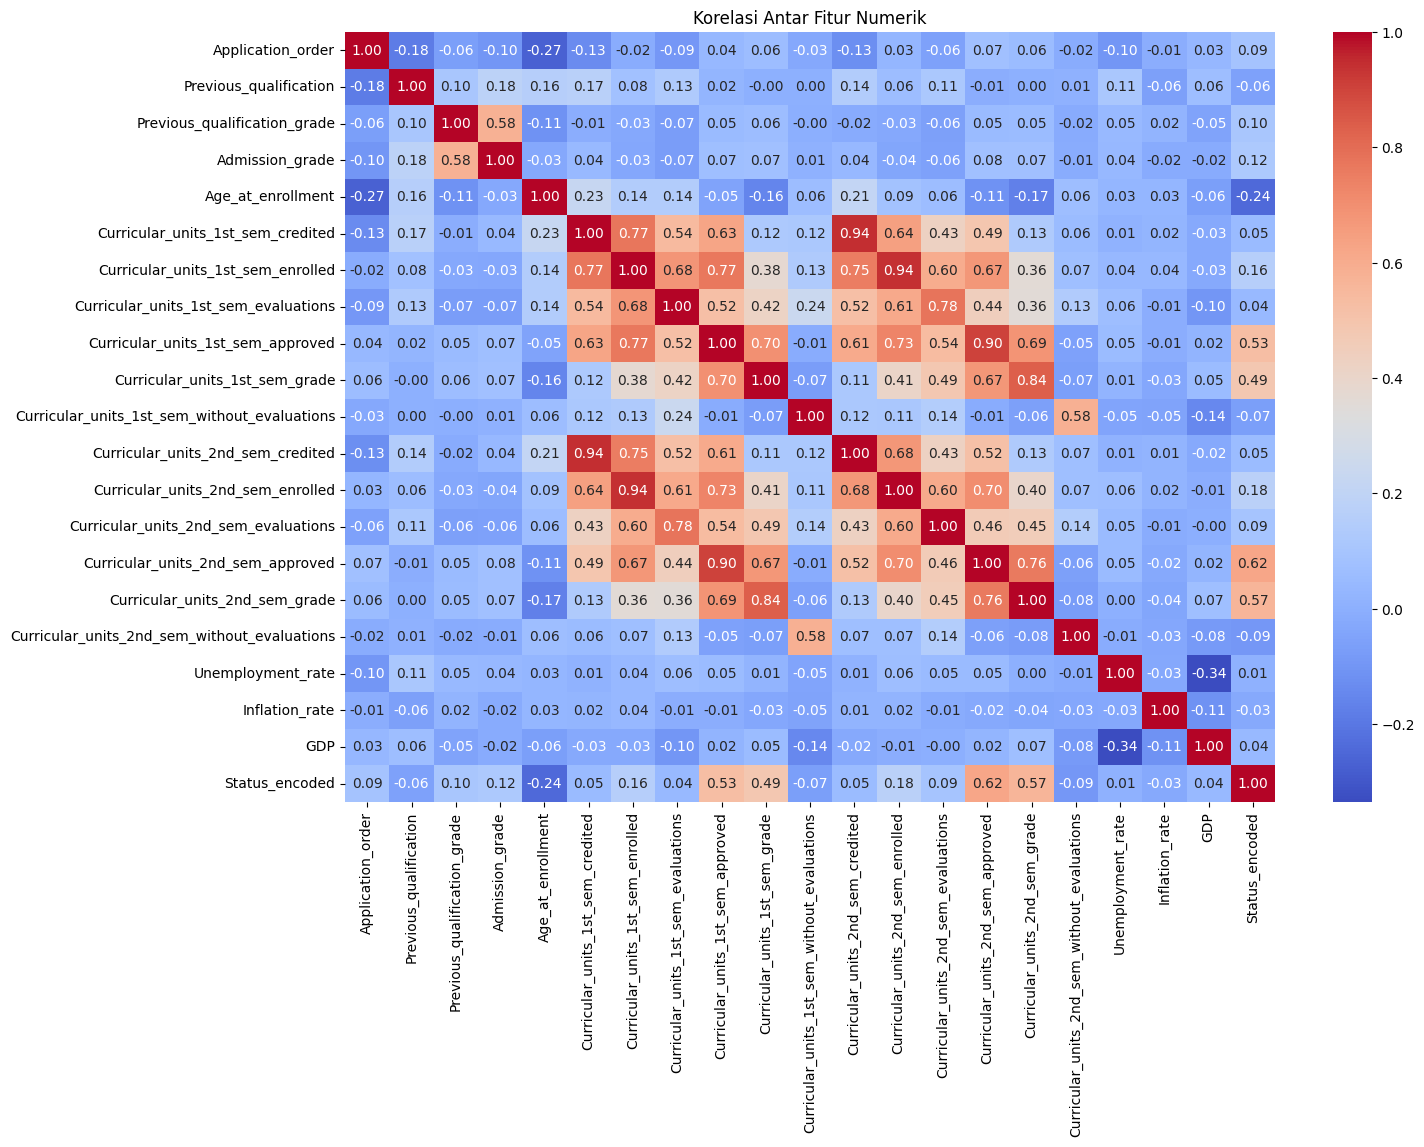

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_df, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Korelasi Antar Fitur Numerik')
plt.show()

Dari diagram di atas terlihat beberapa fitur punya nilai korelasi yang cukup tinggi lebih dari 0,5. Untuk mengetahuinya lebih rinci, kita akan mengurutkan nilai korelasi masing-masing fitur seperti di bawah ini:

In [22]:
dropout_corr = corr_df['Status_encoded'].drop('Status_encoded')
sorted_corr = dropout_corr.sort_values(ascending=False)
print("Peringkat Korelasi Variabel Numerik terhadap Tingkat Dropout")
sorted_corr

Peringkat Korelasi Variabel Numerik terhadap Tingkat Dropout


Curricular_units_2nd_sem_approved               0.624157
Curricular_units_2nd_sem_grade                  0.566827
Curricular_units_1st_sem_approved               0.529123
Curricular_units_1st_sem_grade                  0.485207
Curricular_units_2nd_sem_enrolled               0.175847
Curricular_units_1st_sem_enrolled               0.155974
Admission_grade                                 0.120889
Previous_qualification_grade                    0.103764
Curricular_units_2nd_sem_evaluations            0.092721
Application_order                               0.089791
Curricular_units_2nd_sem_credited               0.054004
Curricular_units_1st_sem_credited               0.048150
Curricular_units_1st_sem_evaluations            0.044362
GDP                                             0.044135
Unemployment_rate                               0.008627
Inflation_rate                                 -0.026874
Previous_qualification                         -0.056039
Curricular_units_1st_sem_withou

Untuk memudahkan analisa, bisa di visualisaikan juga menggunakan diagram batang.

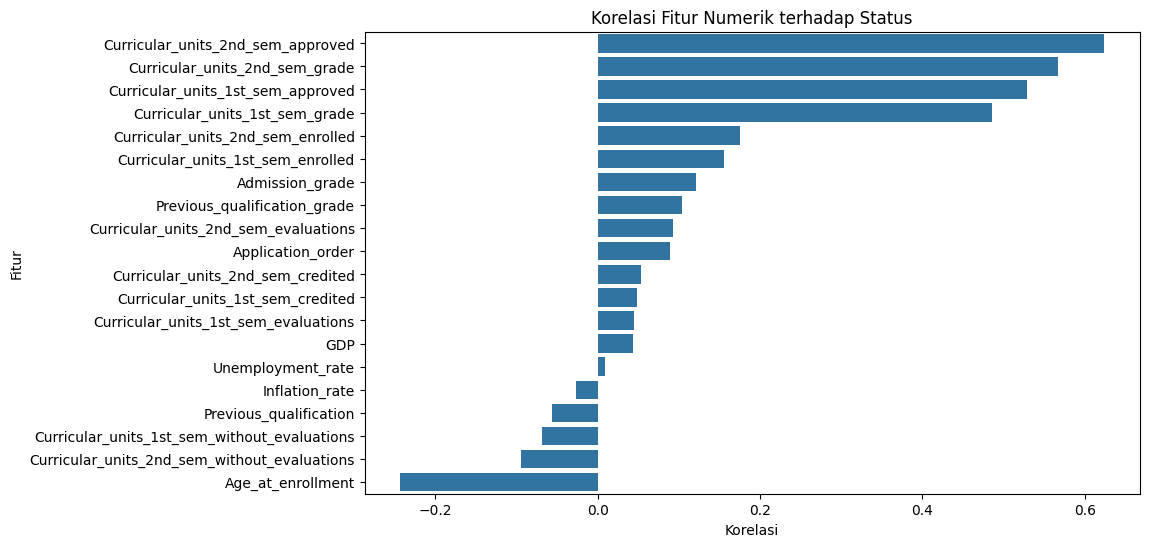

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x=sorted_corr.values, y=sorted_corr.index)
plt.title("Korelasi Fitur Numerik terhadap Status")
plt.xlabel("Korelasi")
plt.ylabel("Fitur")
plt.show()

Bedasarkan visualisasi di atas, terlihat bahwa sebagian besar fitur numerik memilki korelasi positif terhadap status siswa, karena tadi kita melakukan encoding dengan format `[Dropout: 0, Enrolled: 1, Graduate: 2]` ini berarti fitur yang memiliki korelasi positif jika nilainya semakin tinggi maka menunjukkan semakin tinggi peluang siswa tersebut berstatus `Graduate` (lulus). Fitur-fitur yang memilki nilai korelasi positif lebih dari 0.2 adalah fitur yang berkaitan dengan faktor akademis yaitu `Curricular_units_2nd_sem_approved`, `Curricular_units_2nd_sem_grade`, `Curricular_units_1st_sem_approved`, dan `Curricular_units_1st_sem_grade`. Dan terdapat juga satu fitur dengan nilai korelasi negatif yang signifikan lebih dari 0.2 yaitu `Age_at_enrollment` yang berarti semakin tua usia siswa saat mendaftar maka samkin tinggi peluangnya untuk Dropout.

Untuk memastikan korelasinya sesuai, kita bisa pratinjau dengan melihat nilai rata-rata dari fitur-fitur tersebut terhadap status.

In [24]:
# Cek nilai rata-rata setiap kolom untuk masing-masing status 
num_df.groupby('Status_encoded').mean(numeric_only=True)


,Application_order,Previous_qualification,Previous_qualification_grade,Admission_grade,Age_at_enrollment,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
Status_encoded,,,,,,,,,,,,,,,,,,,,
0,1.593244,5.311049,131.114075,124.961365,26.068966,0.609430,5.821253,7.751583,2.551724,7.256656,0.192118,0.449683,5.780436,7.173821,1.940183,5.899339,0.237861,11.616397,1.283955,-0.150859
1,1.625945,4.785894,131.208438,125.534257,22.369018,0.507557,5.964736,9.341310,4.318640,11.125257,0.177582,0.358942,5.938287,9.435768,4.057935,11.117364,0.187657,11.272544,1.211713,0.053287
2,1.851064,4.031236,134.082707,128.794432,21.783612,0.847442,6.669534,8.276596,6.232232,12.643655,0.088275,0.666818,6.628339,8.142146,6.177003,12.697276,0.080579,11.639339,1.197918,0.081833


Dari dataframe di atas, terlihat bahwa hubungan nilai rata-rata fitur-fitur numerik terhadap status sesuai dengan hasil analisis korelasi.

Untuk memvisualisasikan pengaruh fitur numerik yang signifikan terhadap tingkat dropout, akan dilakukan plotting dengan diagram.

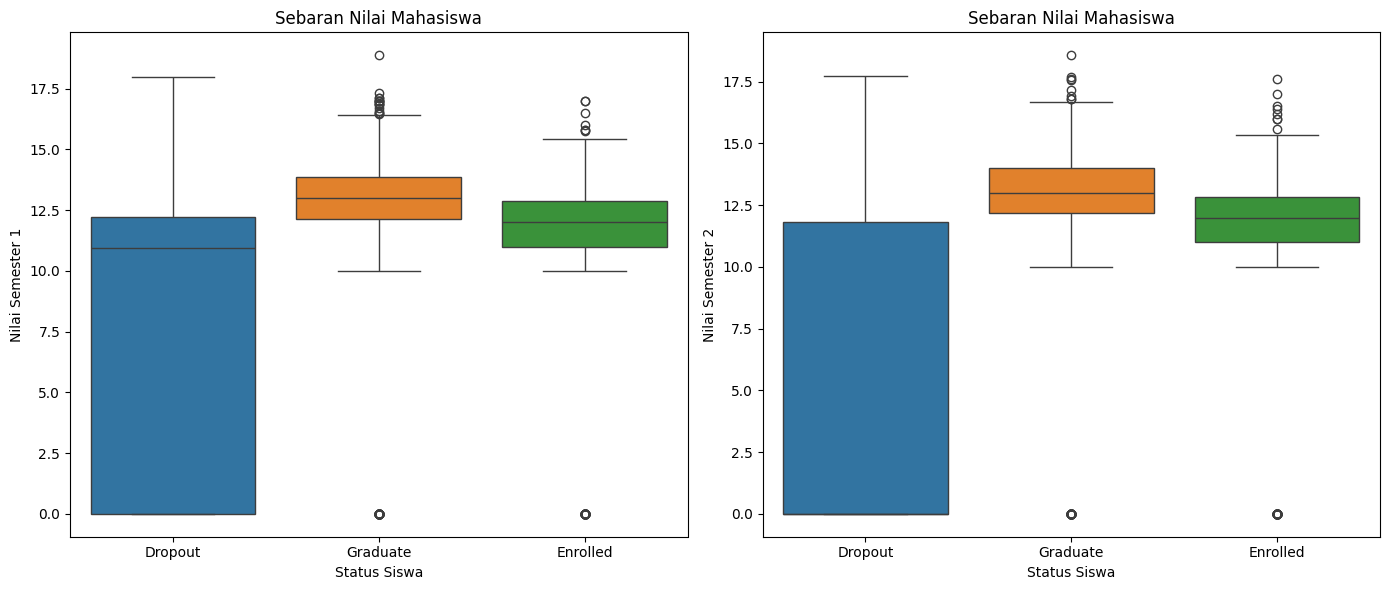

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6)) 

#plot grafik semester 1
sns.boxplot(data= eda_df, x='Status', 
            y='Curricular_units_1st_sem_grade', ax=ax1, hue='Status')
ax1.set_title('Sebaran Nilai Mahasiswa')
ax1.set_xlabel('Status Siswa')
ax1.set_ylabel('Nilai Semester 1')

#plot grafik semester 2
sns.boxplot(data= eda_df, x='Status', 
            y='Curricular_units_2nd_sem_grade', ax=ax2, hue='Status')
ax2.set_title('Sebaran Nilai Mahasiswa')
ax2.set_xlabel('Status Siswa')
ax2.set_ylabel('Nilai Semester 2')

plt.tight_layout()
plt.show()

Berdasarkan diagram di atas, terlihat bahwa siswa yang dropout memilki nilai yang rendah dibandingkan dengan siswa yang lulus.

Kemudian, kita akan melihat dari jumlah mata kuliah yang berhasil diselesaikan oleh siswa yang dropout.

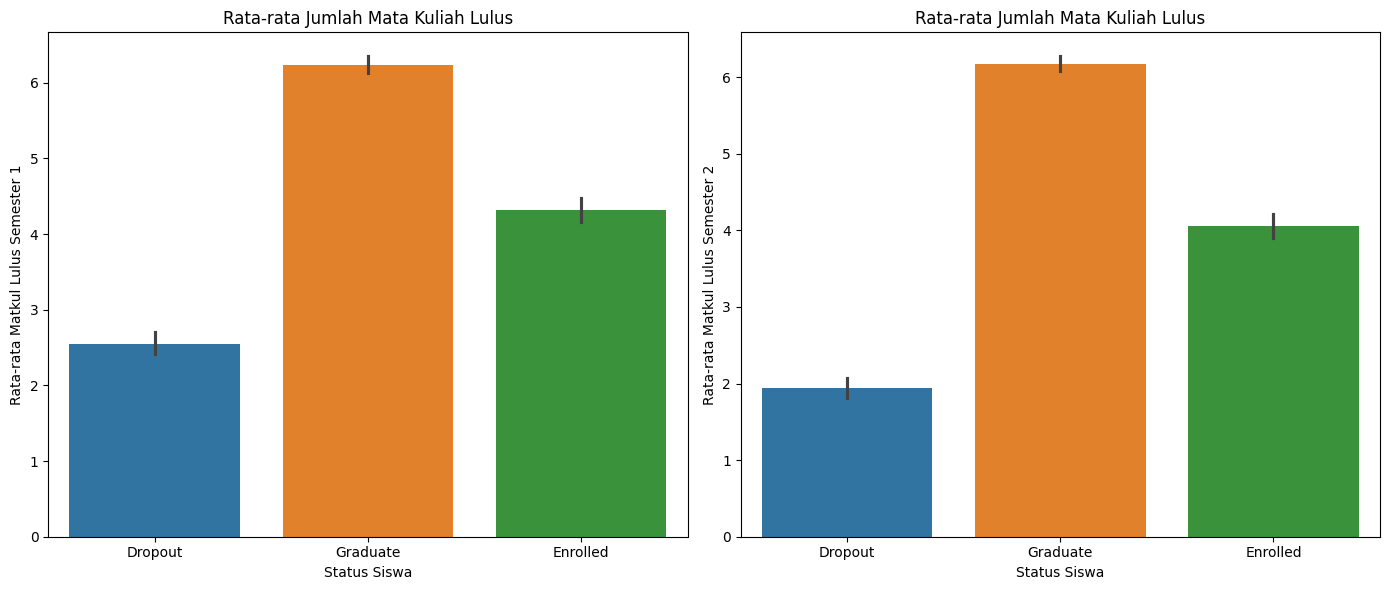

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6)) 

#plot grafik semester 1
sns.barplot(data=eda_df, x='Status', 
            y='Curricular_units_1st_sem_approved', ax=ax1, hue='Status')
ax1.set_title('Rata-rata Jumlah Mata Kuliah Lulus')
ax1.set_xlabel('Status Siswa')
ax1.set_ylabel('Rata-rata Matkul Lulus Semester 1')

#plot grafik semester 2
sns.barplot(data=eda_df, x='Status', 
            y='Curricular_units_2nd_sem_approved', ax=ax2, hue='Status')
ax2.set_title('Rata-rata Jumlah Mata Kuliah Lulus')
ax2.set_xlabel('Status Siswa')
ax2.set_ylabel('Rata-rata Matkul Lulus Semester 2')

plt.tight_layout()
plt.show()


Terlihat bahwa siswa yang dropout pada kedua semester selalu memilki rata-rata jumlah mata kuliah yang paling rendah dibandingkan siswa yang lulus. Hal ini mengonfirmasi hasil dari analisis korelasi yang telah dilakukan, bahwa faktor akademis memilki nilai korelasi positif yang berarti semakin kecil nilainya, semakin rentan siswa tersebut dropout.

Terdapat fitur yang menarik untuk ditinjau lebih lanjut yaitu `Age_at_enrollment` yang memiliki nilai korelasi negatif cukup tinggi dibandingkan fitur lainnya. Akan dilakukan analisis sebaran siswa dropout terhadap fitur ini berdasarkan performa akademiknya.

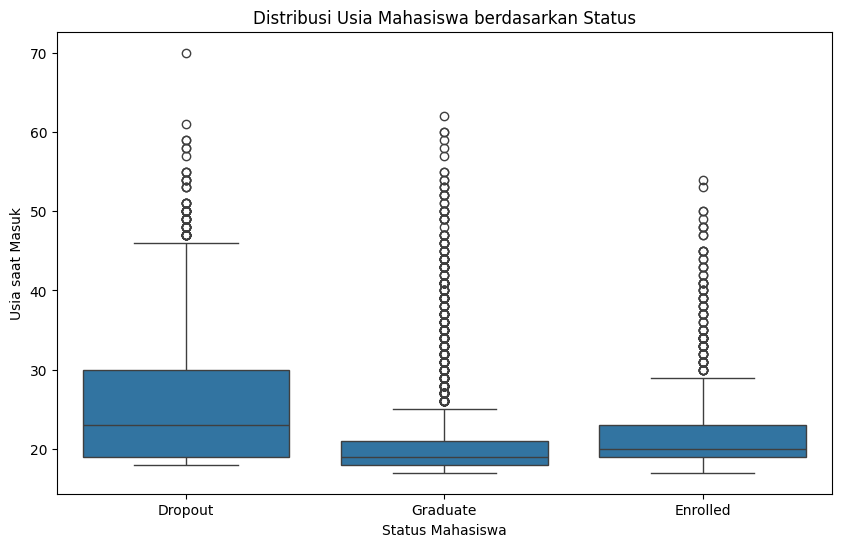

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=eda_df,
    x='Status',
    y='Age_at_enrollment',
)
plt.title('Distribusi Usia Mahasiswa berdasarkan Status')
plt.xlabel('Status Mahasiswa')
plt.ylabel('Usia saat Masuk')
plt.show()


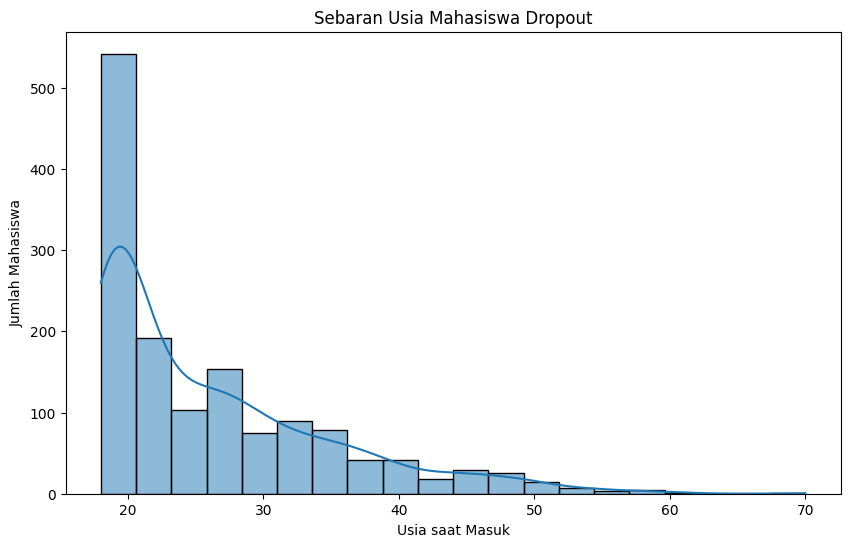

In [28]:
plt.figure(figsize=(10,6))
sns.histplot(
    data=eda_df[eda_df['Status'] == 'Dropout'],
    x='Age_at_enrollment',
    bins=20,
    kde=True,
)
plt.title('Sebaran Usia Mahasiswa Dropout')
plt.xlabel('Usia saat Masuk')
plt.ylabel('Jumlah Mahasiswa')
plt.show()

Terlihat bahwa sebaran siswa dropout memiliki rentang yang lebar dari usia 20-an hingga 70 tahun, kategori ini paling lebar dibandingkan kategori lulus (*graduate*) dan *enroll*. Walaupun sebaran usia pada siswa dropout sendiri didominasi oleh siswa dengan usia 20-an, rentang yang lebar pada usian 20-an ke atas menunjukkan siswa dengan usia tersebut rentan dropout dibandingkan dengan siswa usia 20-an ke bawah.

Untuk melihat lebih detail performa akademik pada siswa dengan kelompok usia di atas 23 tahun yang menggunakan jalur masuk siswa di atas 23 tahun, akan dilakukan visualisasi yang memperlihatkan performa akademik dari kelompok usia ini.

In [31]:
mode_filter = eda_df[eda_df['Application_mode']==39]

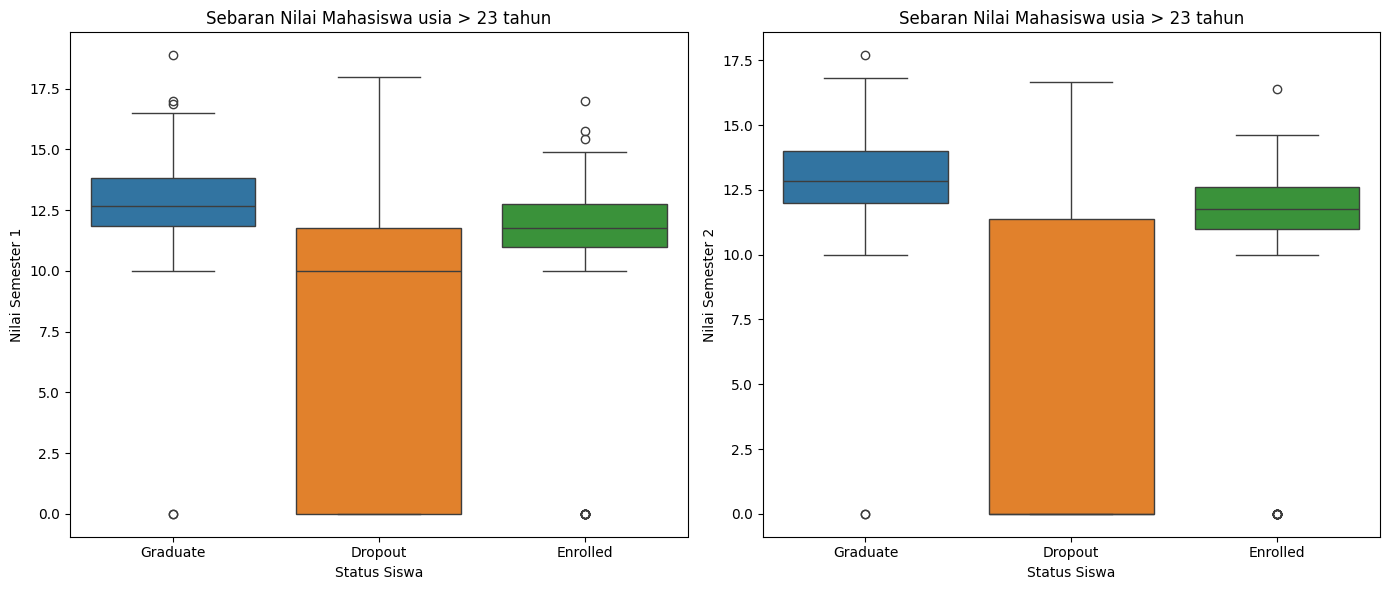

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6)) 

#plot grafik semester 1
sns.boxplot(data= mode_filter, x='Status', 
            y='Curricular_units_1st_sem_grade', ax=ax1, hue='Status')
ax1.set_title('Sebaran Nilai Mahasiswa usia > 23 tahun')
ax1.set_xlabel('Status Siswa')
ax1.set_ylabel('Nilai Semester 1')

#plot grafik semester 2
sns.boxplot(data= mode_filter, x='Status', 
            y='Curricular_units_2nd_sem_grade', ax=ax2, hue='Status')
ax2.set_title('Sebaran Nilai Mahasiswa usia > 23 tahun')
ax2.set_xlabel('Status Siswa')
ax2.set_ylabel('Nilai Semester 2')

plt.tight_layout()
plt.show()

Diagram di atas menunjukkan bahwa kelompok siswa usia 23 tahun ke atas didominasi oleh perolehan nilai yang cukup rendah.

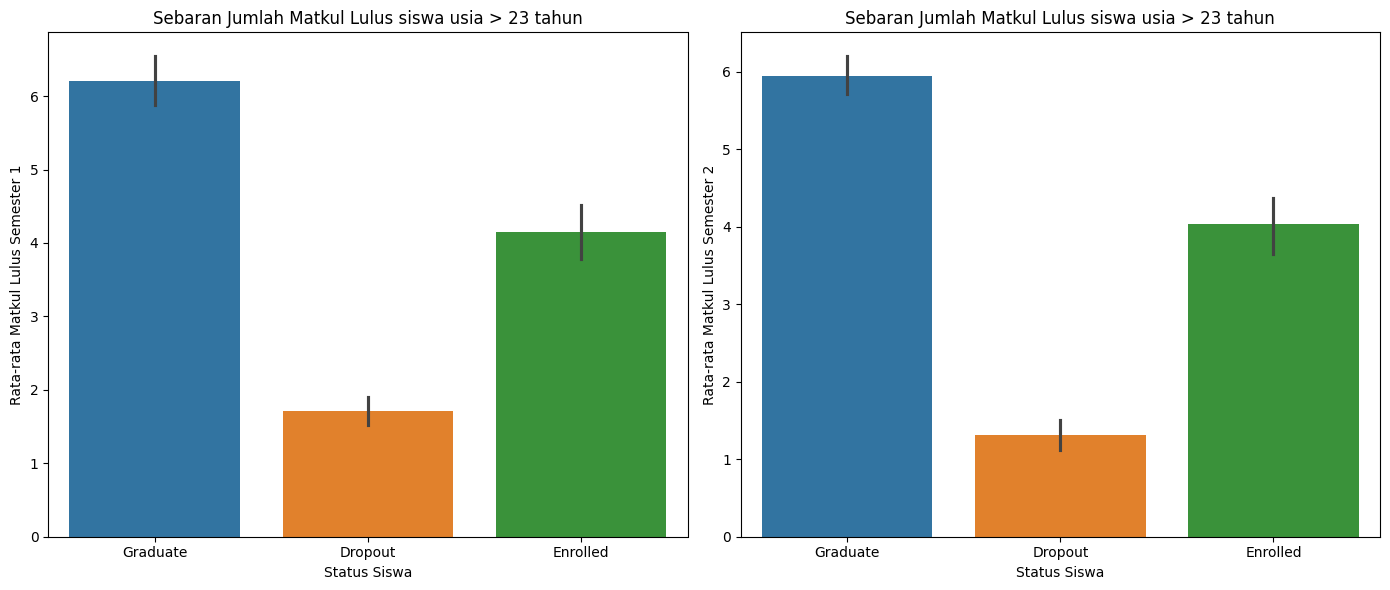

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6)) 

#plot grafik semester 1
sns.barplot(data=mode_filter, x='Status', 
            y='Curricular_units_1st_sem_approved', ax=ax1, hue='Status')
ax1.set_title('Sebaran Jumlah Matkul Lulus siswa usia > 23 tahun')
ax1.set_xlabel('Status Siswa')
ax1.set_ylabel('Rata-rata Matkul Lulus Semester 1')

#plot grafik semester 2
sns.barplot(data=mode_filter, x='Status', 
            y='Curricular_units_2nd_sem_approved', ax=ax2, hue='Status')
ax2.set_title('Sebaran Jumlah Matkul Lulus siswa usia > 23 tahun')
ax2.set_xlabel('Status Siswa')
ax2.set_ylabel('Rata-rata Matkul Lulus Semester 2')

plt.tight_layout()
plt.show()


Digram di atas menunjukkan perolehan jumlah mata kuliah yang dapat diselesaikan oleh siswa dropout pada kelompok usia ini, dan menunjukkan siswa yang dropout pada kelompok ini rata-rata hanya lulus 1-2 mata kuliah saja.

Hal ini menunjukkan bahwa usia juga berpengaruh pada performa akademik dan berpengaruh terhadap tingkat dropout.

## Data Preparation / Preprocessing

Sebelum melakukan preprocessing, kita akan menduplikasi `raw_df` untuk menjaga konsistensinya menjadi `prep_df`.

In [34]:
prep_df = raw_df.copy()
prep_df.columns

Index(['﻿Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_wi

Ubah kolom yang seharusnya bertipe boolean namun belum bertipe boolean.

In [35]:
bool_cols = ['Displaced','Educational_special_needs', 'Debtor','Tuition_fees_up_to_date','Scholarship_holder','International']
prep_df[bool_cols] = prep_df[bool_cols].astype(bool)
prep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ﻿Marital_status                               4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Pastikan data pada kolom `Status` berisi `['Dropout', 'Graduate', 'Enrolled']`

In [36]:
prep_df['Status'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

Pada kasus ini dapat dilakukan modeling secara **multikelas** dan **biner**. Karena tujuan dari proyek ini adalah untuk menanggulangi tingginya siswa dropout, maka akan lebih tepat jika dilakukan pendekatan analisis biner dengan membuat fitur baru yang menampung data yang menyatakan siswa tersebut dropout atau tidak yaitu kolom `is_Dropout`. Yang berarti status `Graduate` dan `Enrolled` akan dilebur menjadi satu kategori `TRUE` pada kolom tersebut, dan status `Dropout` bernilai `FALSE`.

Membuat kolom `is_Dropout`

In [37]:
prep_df['is_Dropout'] = prep_df['Status'].apply(lambda x: True if x == 'Dropout' else False)
prep_df.head()

,﻿Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status,is_Dropout
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,True
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,False
2,1,1,5,9070,1,1,122.0,1,37,37,...,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout,True
3,1,17,2,9773,1,1,122.0,1,38,37,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,False
4,2,39,1,8014,0,1,100.0,1,37,38,...,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,False


Kolom `is_Dropout` telah berhasil diisi dengan format `[Dropout: True, Enrolled: False, Graduate: False]`.

Selanjutnya dilakukan split data X dan y

In [38]:
# Split data
X = prep_df.drop(columns={'Status','is_Dropout'})
y = prep_df['is_Dropout'].astype(int)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Modeling

Pada tahap modelling ini akan digunakan tiga algoritma pemodelan yang optimal untuk melakukkan klasifikasi pada kasus ini yaitu **Random Forest, XGBoost, dan Logistic Regression**. Serta dengan bantuan hyperparameter tuner `GridSearchCV()` untuk mempermudah menemukan parameter modelling yang optimal.

Pertama, dilakukan modelling dengan **Random Forest**. Selain itu juga digunakan hyperparamter tuner `GridSearchCV()` untuk mempermudah menemukan paramter model yang optimal.

In [40]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [41]:
#Random Forest
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

grid_param_rf = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf': [1, 2],
    'rf__max_features': ['sqrt', 'log2']
}

grid_rf = GridSearchCV(rf_pipeline, grid_param_rf, cv=kf, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_rf.fit(X, y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [None, 10, 20],
                         'rf__max_features': ['sqrt', 'log2'],
                         'rf__min_samples_leaf': [1, 2],
                         'rf__min_samples_split': [2, 5],
                         'rf__n_estimators': [100, 200]},
             scoring='roc_auc', verbose=1)

Selanjutnya, dilakukan modelling dengan **XGBoost** dengan hyperparamter tuner `GridSearchCV()` untuk mempermudah menemukan paramter model yang optimal.

In [42]:
# Definisikan model
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(random_state=42, eval_metric='logloss'))
])

# Hyperparameter grid
param_grid_xgb = {
    'xgb__n_estimators': [100, 200],
    'xgb__max_depth': [3, 5],
    'xgb__learning_rate': [0.05, 0.1],
    'xgb__subsample': [0.8, 1.0]
}

# Grid search
grid_xgb = GridSearchCV(xgb_pipeline, param_grid_xgb, scoring='roc_auc', cv=kf, verbose=1, n_jobs=-1, error_score='raise')

grid_xgb.fit(X , y)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score='raise',
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_me...
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'xgb__learning_rate': [0.05, 0.1],
                         'xgb__max_depth': [3, 5],
                         'xgb__n_estimators': [100, 200],
                         'xgb__subsample': [0.8, 1.0]},
             scoring='roc_auc', verbose=1)

Terakhir  modelling dengan **Logistic Regression** dengan hyperparamter tuner `GridSearchCV()` untuk mempermudah menemukan paramter model yang optimal.

In [43]:
# Logistic Regression dengan hyperparameter tuning
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'))
])
lr = LogisticRegression(max_iter=1000, random_state=42)
grid_param_lr = {
    'lr__C': [0.01, 0.1, 1, 10],
    'lr__penalty': ['l2'],
    'lr__solver': ['lbfgs']
}

grid_lr = GridSearchCV(lr_pipeline, grid_param_lr, cv=kf, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_lr.fit(X, y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lr',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=1000,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'lr__C': [0.01, 0.1, 1, 10], 'lr__penalty': ['l2'],
                         'lr__solver': ['lbfgs']},
             scoring='roc_auc', verbose=1)

## Evaluation

Setelah melakukan modelling, selanjutnya kita simpan hasil pemodellan dengan paramter terbaiknya dalam dictionary `model`.

In [44]:
# Evaluasi model terbaik
models = {
    'Logistic Regression': grid_lr.best_estimator_,
    'Random Forest' : grid_rf.best_estimator_,
    'XGBoost': grid_xgb.best_estimator_,
}

Setelah itu, dilakukan evaluasi terhadap masing-masing model dengan confusion matriks dan parameter Accuracy, Precission, dan F-1 Score


 Evaluasi Logistic Regression dengan Cross-Validation:

Logistic Regression Evaluation:


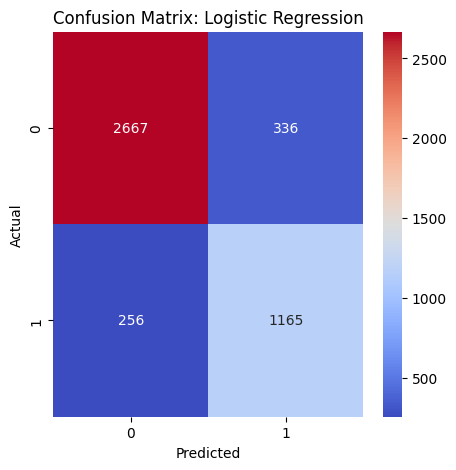


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      3003
           1       0.78      0.82      0.80      1421

    accuracy                           0.87      4424
   macro avg       0.84      0.85      0.85      4424
weighted avg       0.87      0.87      0.87      4424

 Accuracy: 0.8662 | Precision: 0.8686 | Recall: 0.8662 | F1 Score: 0.8671 | ROC AUC: 0.9185


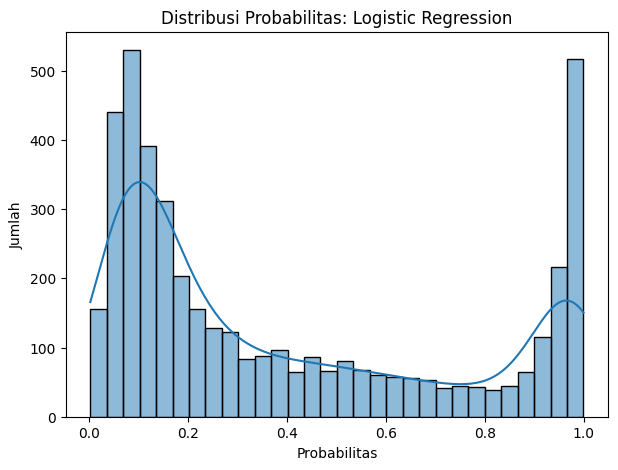


 Evaluasi Random Forest dengan Cross-Validation:

Random Forest Evaluation:


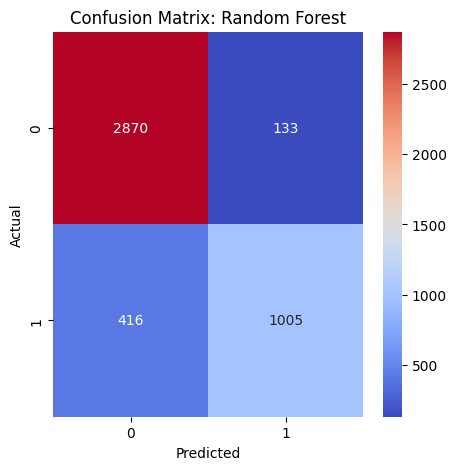


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      3003
           1       0.88      0.71      0.79      1421

    accuracy                           0.88      4424
   macro avg       0.88      0.83      0.85      4424
weighted avg       0.88      0.88      0.87      4424

 Accuracy: 0.8759 | Precision: 0.8765 | Recall: 0.8759 | F1 Score: 0.8718 | ROC AUC: 0.9220


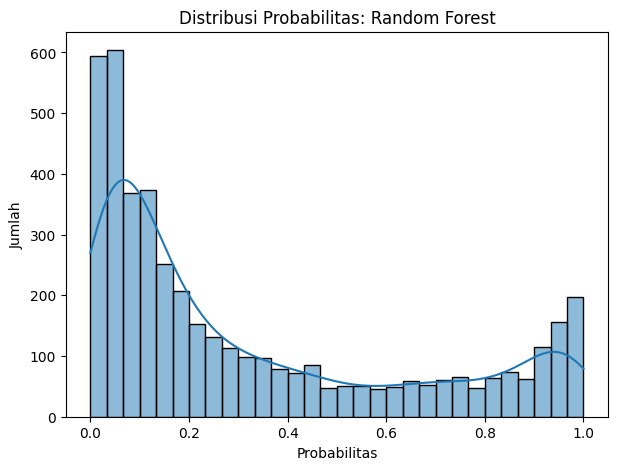


 Evaluasi XGBoost dengan Cross-Validation:

XGBoost Evaluation:


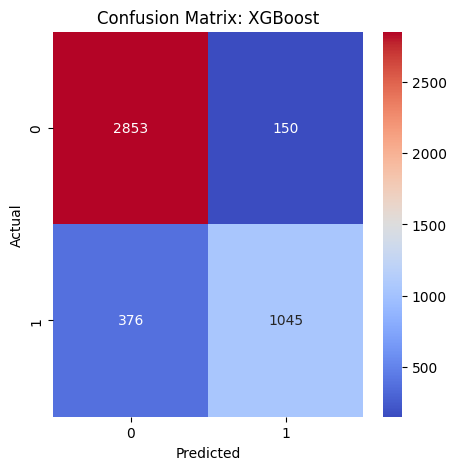


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      3003
           1       0.87      0.74      0.80      1421

    accuracy                           0.88      4424
   macro avg       0.88      0.84      0.86      4424
weighted avg       0.88      0.88      0.88      4424

 Accuracy: 0.8811 | Precision: 0.8806 | Recall: 0.8811 | F1 Score: 0.8781 | ROC AUC: 0.9281


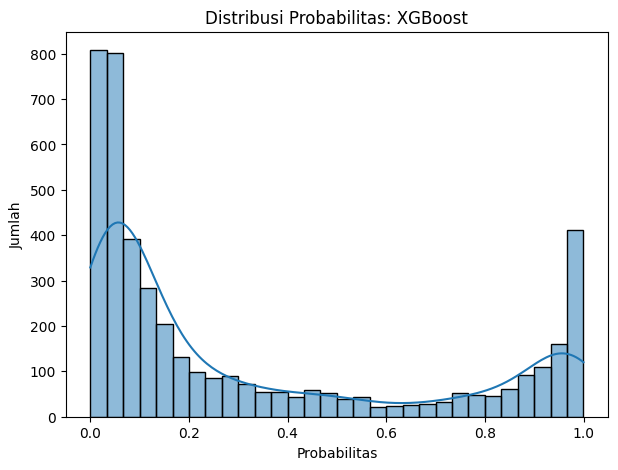


Tabel Perbandingan Model
                 Model  Accuracy  Precision    Recall  F1-Score   ROC AUC
0  Logistic Regression  0.866184   0.868649  0.866184  0.867113  0.918456
1        Random Forest  0.875904   0.876526  0.875904  0.871834  0.921990
2              XGBoost  0.881103   0.880639  0.881103  0.878123  0.928118


In [86]:
# Tabel Perbandingan
model_comparison = pd.DataFrame()

for name, model in models.items():
    print(f"\n Evaluasi {name} dengan Cross-Validation:")

    y_pred = cross_val_predict(model, X, y, cv=kf)
    y_proba = cross_val_predict(model, X, y, cv=kf, method='predict_proba')[:, 1]
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')
    roc_auc = roc_auc_score(y, y_proba)

    score_df = pd.DataFrame({
        "Model": [name],
        "Accuracy": [accuracy],
        "Precision": [precision],
        "Recall": [recall],
        "F1-Score": [f1],
        "ROC AUC":[roc_auc]
    })

    model_comparison = pd.concat([model_comparison, score_df], ignore_index=True)
    
    print(f"\n{name} Evaluation:")
    plt.figure(figsize=(5,5))
    sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt='d', cmap='coolwarm')
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    print("\nClassification Report:")
    print(classification_report(y, y_pred))
    print(f" Accuracy: {accuracy:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | F1 Score: {f1:.4f} | ROC AUC: {roc_auc:.4f}")
    plt.figure(figsize=(7,5))
    sns.histplot(y_proba,bins=30, edgecolor='black', kde=True)
    plt.title(f"Distribusi Probabilitas: {name}")
    plt.xlabel("Probabilitas")
    plt.ylabel("Jumlah")
    plt.show()

print("\nTabel Perbandingan Model")
print(model_comparison)

Berdasarkan hasil evaluasi di atas, terlihat bahwa model **XGBoost** memilki poin yang paling baik, dengan perolehan skor:

- `Accuracy`: **0.8811**
- `Precission`: **0.8806**
- `Recall`: **0.8811**
- `F-1 Score`: **0.8781**
- `ROC AUC`: **0.9281**

Maka untuk analisis selanjutnya akan berfokus pada model **XGBoost**.

Selanjutnya dilakukan analisis `feature_importance` untuk melihat fitur-fitur yang berpengaruh signifikan terhadap model

In [46]:
# Ambil feature importance
xgb_importance = models['XGBoost'].named_steps['xgb'].feature_importances_ #ambil dari pipeline
xgb_features = pd.Series(xgb_importance, index=X.columns).sort_values(ascending=False)

Di bawah ini adalah 10 fitur dengan nilai yang paling tinggi

In [47]:
xgb_features.head(10)

Curricular_units_2nd_sem_approved               0.285729
Tuition_fees_up_to_date                         0.120368
Curricular_units_1st_sem_enrolled               0.062965
Scholarship_holder                              0.042554
Curricular_units_2nd_sem_grade                  0.038359
Curricular_units_1st_sem_approved               0.037573
Age_at_enrollment                               0.036161
Debtor                                          0.026249
Curricular_units_2nd_sem_credited               0.025350
Curricular_units_2nd_sem_without_evaluations    0.025155
dtype: float32

Jika divisualisasikan, maka akan didapatkan hasil sebagai berikut

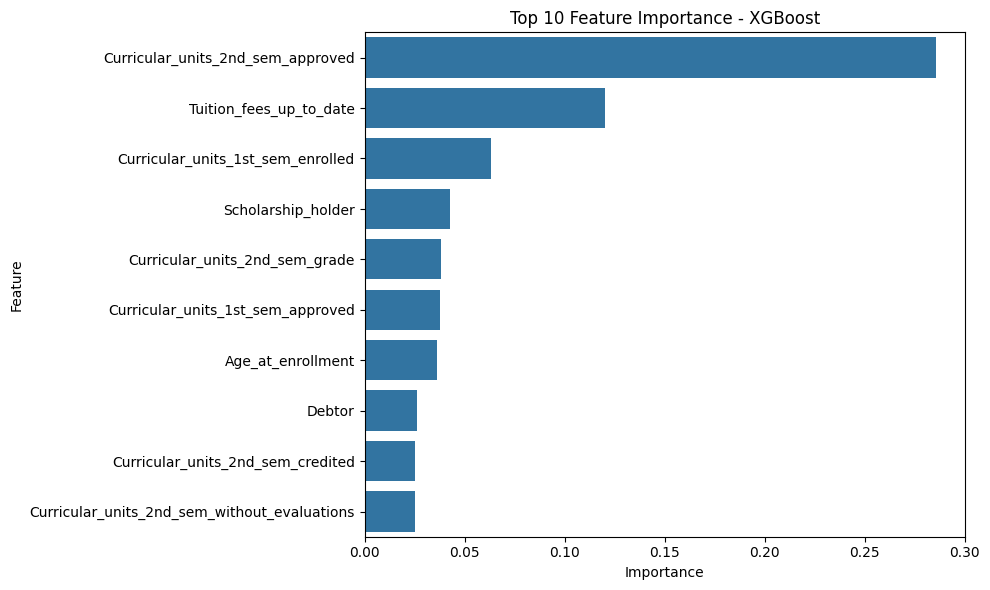

In [48]:
# Visualisasikan
plt.figure(figsize=(10, 6))
sns.barplot(x=xgb_features[:10], y=xgb_features.index[:10])
plt.title('Top 10 Feature Importance - XGBoost')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

Visualisasi dengan SHAP

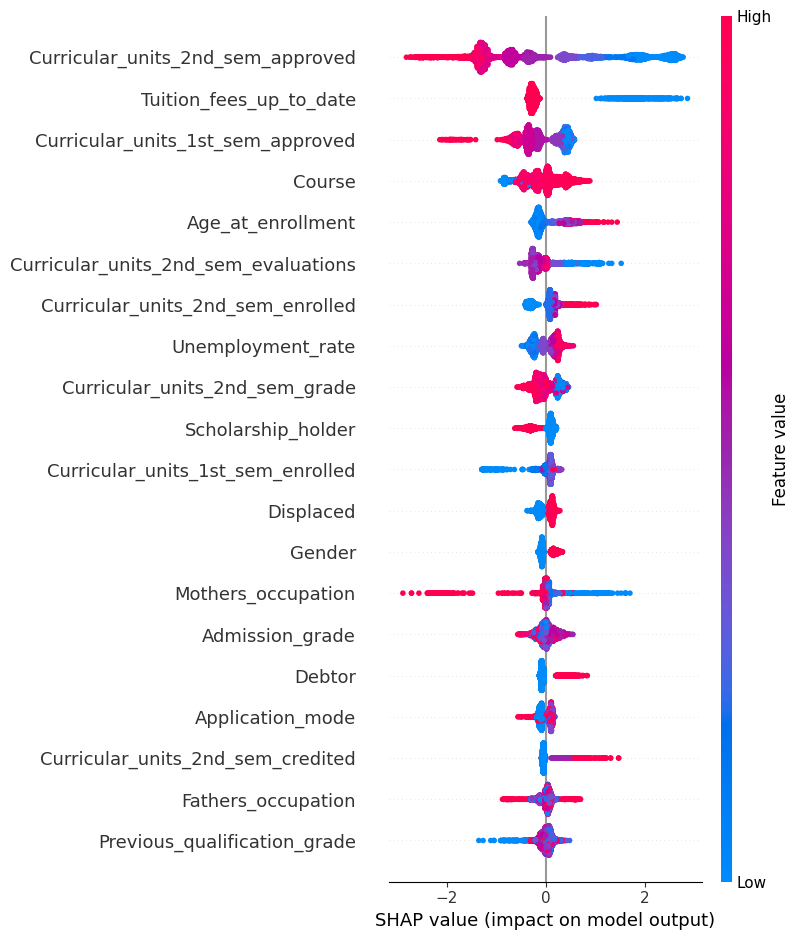

In [49]:
xgb_model = grid_xgb.best_estimator_.named_steps['xgb']
X_transformed = grid_xgb.best_estimator_.named_steps['scaler'].transform(X)

# SHAP explainer
explainer = shap.Explainer(xgb_model, X_transformed)
shap_values = explainer(X_transformed)

# Summary plot (global feature importance)
feature_names = X.columns
shap.summary_plot(shap_values, X_transformed, feature_names=feature_names)

Terlihat bahwa sebagian besar fitur yang berpengaruh adalah fitur-fitur akademik siswa, yaitu penilaian kurikulum pada semester 1 dan 2, namun yang paling berpengaruh adalah kurikulum pada semester 2. Selain itu juga, pada 10 teratas fitur penting ada fitur ekonomi `Tuition_fees_up_to_date`, `Scholarship_holder`, `Debtor` dan latar belakang umur `Age_at_enrollment` yang juga turut mendominasi. 

Dari hasil di atas, maka dapat disimpulkan bahwa faktor utama yang menjadi indikator siswa dropout adalah:
1. Performa akademik terutama pada semester 2
2. Kemampuan siswa membayar biaya tepat waktu, bisa diakitkan juga dengan kemampuan ekonomi siswa atau latar belakang ekonomi keluarga siswa.
3. Umur siswa saat mendaftar juga berpengaruh karena berdsarkan analisis kategorikal, siswa yang dropout didominasi oleh siswa yang mendaftar dengan jalur di atas umur 23 tahun.

Selanjutnya, dataframe `feature importance` dieksport untuk ditampilkan pada dashboard.

In [50]:
xgb_features.to_excel('./output-files/feature importance.xlsx')

## Deployment

Setelah model selesai dievaluasi, model akan di deploy dengan bantuan joblib agar dapat digunakan dan dipanggil pada aplikasi.

In [51]:
# Simpan model dan scaler
joblib.dump(grid_xgb.best_estimator_, './model/model_xgb.pkl')

['./model/model_xgb.pkl']

### Inferensi Model

Akan dilakukan inferensi model untuk menambahkan fitur `Status_Prediction`, `Probablity`, dan `RiskLevel` yang menampilkan prediksi status siswa untuk kemudian akan ditampilkan pada dashboard.

In [52]:
#Load Model
load_model = joblib.load("./model/model_xgb.pkl")

In [53]:
#Load dataset
new_df = prep_df.copy()

In [54]:
#new_df['Status'] = load_encoder.transform(new_df['Status'])
X = new_df.drop(columns={'Status','is_Dropout'})

Melakukan prediksi pada dataset dan menyimpannya pada kolom `Status_Prediction` dan `Probability`.

In [55]:
# Prediksi kelas: 0 = tidak resign, 1 = resign
new_df['Dropout_Prediction'] = load_model.predict(X)

# Probabilitas risiko attrition (kemungkinan resign)
new_df['Probability'] = load_model.predict_proba(X)[:, 1]  # nilai antara 0 - 1

new_df.head()

,﻿Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status,is_Dropout,Dropout_Prediction,Probability
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0.000000,0,10.8,1.4,1.74,Dropout,True,1,0.643718
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,13.666667,0,13.9,-0.3,0.79,Graduate,False,0,0.270076
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0.000000,0,10.8,1.4,1.74,Dropout,True,1,0.984706
3,1,17,2,9773,1,1,122.0,1,38,37,...,5,12.400000,0,9.4,-0.8,-3.12,Graduate,False,0,0.138964
4,2,39,1,8014,0,1,100.0,1,37,38,...,6,13.000000,0,13.9,-0.3,0.79,Graduate,False,0,0.157273


Menampilkan histogram probabilitas prediksi

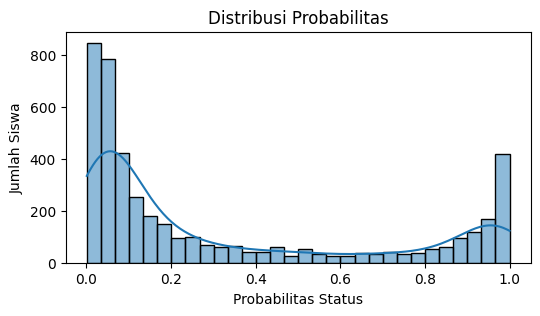

In [56]:
plt.figure(figsize=(6,3))
sns.histplot(new_df['Probability'],bins=30, edgecolor='black', kde=True)
plt.title("Distribusi Probabilitas")
plt.xlabel("Probabilitas Status")
plt.ylabel("Jumlah Siswa")
plt.show()

Melakukan kategorisasi probabilitas menjadi `RiskLevel` dengan menetapkan threshold berdasarkan sebaran nilai probabilitas pada dataset.

In [57]:
high_threshold = new_df['Probability'].quantile(0.85)
medium_threshold = new_df['Probability'].quantile(0.60)

def categorize_risk(score):
    if score >= high_threshold: 
        return "High"
    elif score >= medium_threshold:
        return "Medium"
    else:
        return "Low"

In [58]:
#Kategorisasi Probabilitas
new_df['RiskLevel'] = new_df['Probability'].apply(categorize_risk)

Membuat dataframe `res_df` untuk menampung hasil prediksi

In [59]:
res_df = prep_df.copy()

res_df['Dropout_Prediction'] = new_df['Dropout_Prediction'].astype(bool)
res_df['Probability'] = new_df['Probability']
res_df['RiskLevel'] = new_df['RiskLevel']
res_df.head()

,﻿Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status,is_Dropout,Dropout_Prediction,Probability,RiskLevel
0,1,17,5,171,1,1,122.0,1,19,12,...,0.000000,0,10.8,1.4,1.74,Dropout,True,True,0.643718,Medium
1,1,15,1,9254,1,1,160.0,1,1,3,...,13.666667,0,13.9,-0.3,0.79,Graduate,False,False,0.270076,Medium
2,1,1,5,9070,1,1,122.0,1,37,37,...,0.000000,0,10.8,1.4,1.74,Dropout,True,True,0.984706,High
3,1,17,2,9773,1,1,122.0,1,38,37,...,12.400000,0,9.4,-0.8,-3.12,Graduate,False,False,0.138964,Low
4,2,39,1,8014,0,1,100.0,1,37,38,...,13.000000,0,13.9,-0.3,0.79,Graduate,False,False,0.157273,Low


Agar visualisasi lebih informatif, akan dilakukan mapping pada kolom `Course` dan menampunya di kolom baru `Course_title` yang berisi judul mata kuliah dari data pada kolom `Course`.

In [60]:
course_mapping = {33:'Biofuel Production Technologies', 171:'Animation and Multimedia Design', 8014:'Social Service (evening attendance)', 9003:'Agronomy', 9070:'Communication Design',
                   9085:'Veterinary Nursing', 9119:'Informatics Engineering', 9130:'Equinculture:', 9147:'Management', 9238:'Social Service', 9254:'Tourism', 9500:'Nursing', 
                   9556: 'Oral Hygiene',  9670:'Advertising and Marketing Management', 9773:'Journalism and Communication', 9853:'Basic Education', 9991:'Management (evening attendance)'}
#Mengubah kolom Status menjadi numerik
res_df['Course_title'] = res_df['Course'].map(course_mapping)
res_df.head()

,﻿Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status,is_Dropout,Dropout_Prediction,Probability,RiskLevel,Course_title
0,1,17,5,171,1,1,122.0,1,19,12,...,0,10.8,1.4,1.74,Dropout,True,True,0.643718,Medium,Animation and Multimedia Design
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,13.9,-0.3,0.79,Graduate,False,False,0.270076,Medium,Tourism
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,10.8,1.4,1.74,Dropout,True,True,0.984706,High,Communication Design
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,9.4,-0.8,-3.12,Graduate,False,False,0.138964,Low,Journalism and Communication
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,13.9,-0.3,0.79,Graduate,False,False,0.157273,Low,Social Service (evening attendance)


Dataframe hasil prediksi dieksport ke file excel untuk ditampilkan pada dashboard.

In [76]:
# Export dataset yang telah diprediksi
res_df.to_csv('./output-files/predict_dropout_data.csv',index=False, float_format="%.4f")
res_df.to_excel('./output-files/predict_dropout_data.xlsx',index=False, float_format="%.4f")